Результат підрахунку слів: {'Project': 6, 'Gutenberg': 6, 'Australia': 7, 'Title': 2, 'The': 959, 'Rainbow': 4, 'Author': 2, 'D': 2, 'H': 2, 'Lawrence': 2, 'A': 139, 'of': 4620, 'eBook': 3, 'No': 55, '0100341txt': 1, 'Language': 1, 'English': 23, 'Date': 2, 'first': 124, 'posted': 2, 'December': 4, '2001': 2, 'most': 43, 'recently': 1, 'updated': 1, 'eBooks': 2, 'are': 152, 'created': 16, 'from': 636, 'printed': 1, 'editions': 1, 'which': 366, 'in': 3108, 'the': 9441, 'public': 16, 'domain': 1, 'unless': 6, 'a': 4002, 'copyright': 2, 'notice': 38, 'is': 302, 'included': 3, 'We': 29, 'do': 262, 'NOT': 2, 'keep': 40, 'any': 146, 'compliance': 1, 'with': 1843, 'particular': 13, 'paper': 11, 'edition': 1, 'Copyright': 1, 'laws': 5, 'changing': 7, 'all': 682, 'over': 341, 'world': 273, 'Be': 5, 'sure': 53, 'to': 4784, 'check': 1, 'for': 1022, 'your': 150, 'country': 31, 'before': 187, 'downloading': 1, 'or': 362, 'redistributing': 1, 'this': 474, 'file': 1, 'This': 93, 'made': 263, 'availab

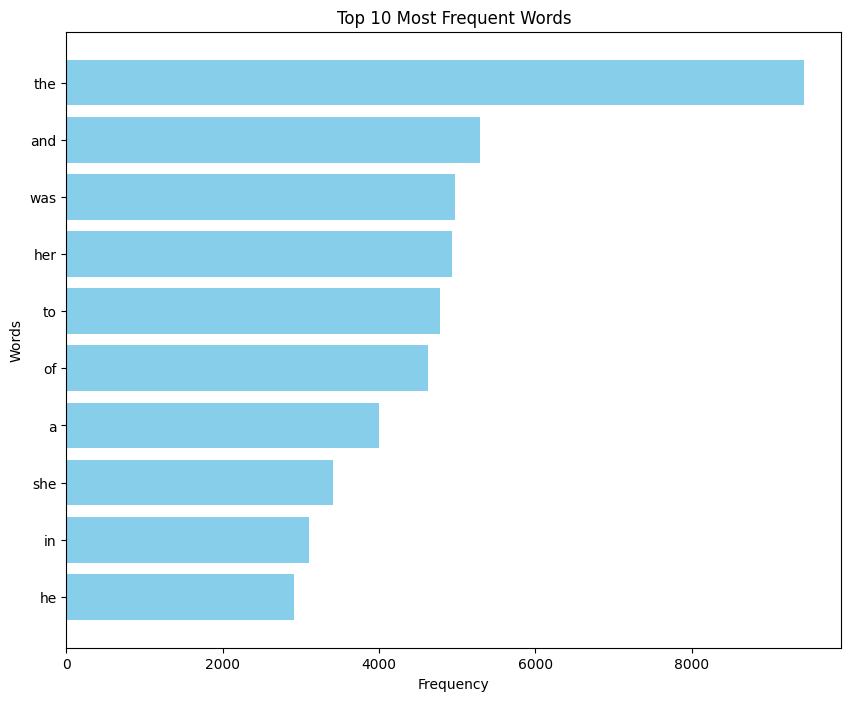

In [22]:
import string
from concurrent.futures import ThreadPoolExecutor
from collections import defaultdict
import requests
import matplotlib.pyplot as plt

def get_text(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Перевірка на помилки HTTP
        return response.text
    except requests.RequestException as e:
        return None

# Функція для видалення знаків пунктуації
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def map_function(word):
    return word, 1

def shuffle_function(mapped_values):
    shuffled = defaultdict(list)
    for key, value in mapped_values:
        shuffled[key].append(value)
    return shuffled.items()

def reduce_function(key_values):
    key, values = key_values
    return key, sum(values)

# Виконання MapReduce
def map_reduce(text, search_words=None):
    # Видалення знаків пунктуації
    text = remove_punctuation(text)
    words = text.split()

    # Якщо задано список слів для пошуку, враховувати тільки ці слова
    if search_words:
        words = [word for word in words if word in search_words]

    # Паралельний Мапінг
    with ThreadPoolExecutor() as executor:
        mapped_values = list(executor.map(map_function, words))

    # Крок 2: Shuffle
    shuffled_values = shuffle_function(mapped_values)

    # Паралельна Редукція
    with ThreadPoolExecutor() as executor:
        reduced_values = list(executor.map(reduce_function, shuffled_values))

    return dict(reduced_values)

# Функція для візуалізації результатів
def visualize_top_words(word_counts, top_n=10):
    sorted_word_counts = sorted(word_counts.items(), key=lambda kv: kv[1], reverse=True)
    top_words, counts = zip(*sorted_word_counts[:top_n])

    plt.figure(figsize=(10, 8))
    plt.barh(top_words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 10 Most Frequent Words')
    plt.gca().invert_yaxis()
    plt.show()

if __name__ == '__main__':
    # Вхідний текст для обробки
    url = "https://gutenberg.net.au/ebooks01/0100341.txt"
    text = get_text(url)
    if text:
        # Виконання MapReduce на вхідному тексті
        result = map_reduce(text)
        print("Результат підрахунку слів:", result)

        # Візуалізація результатів
        visualize_top_words(result, top_n=10)
    else:
        print("Помилка: Не вдалося отримати вхідний текст.")